### Подключение модулей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [8]:
df = pd.read_csv('USA_Housing.csv')

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [14]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


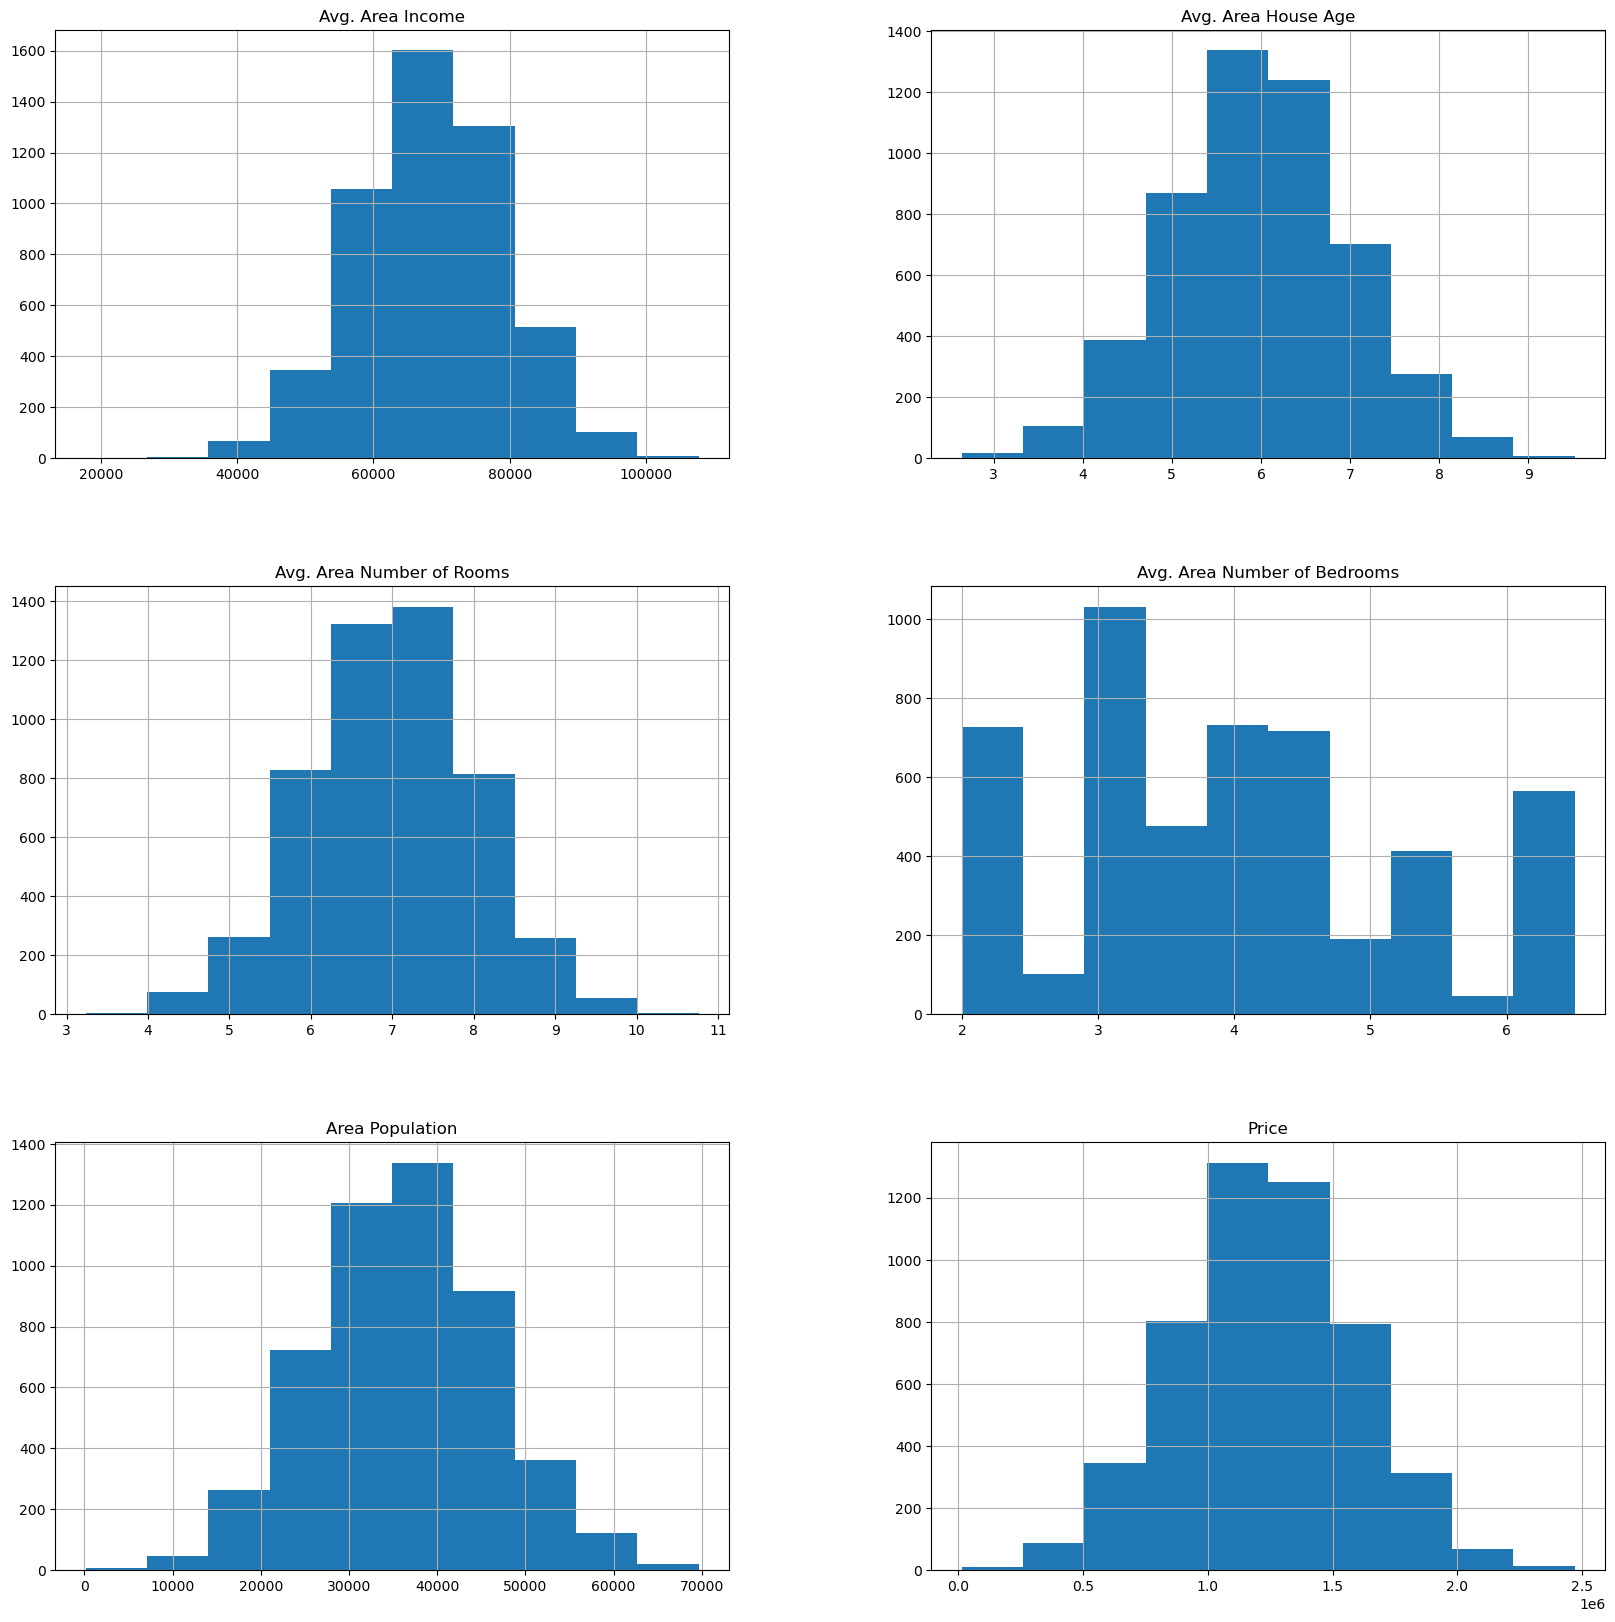

In [15]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

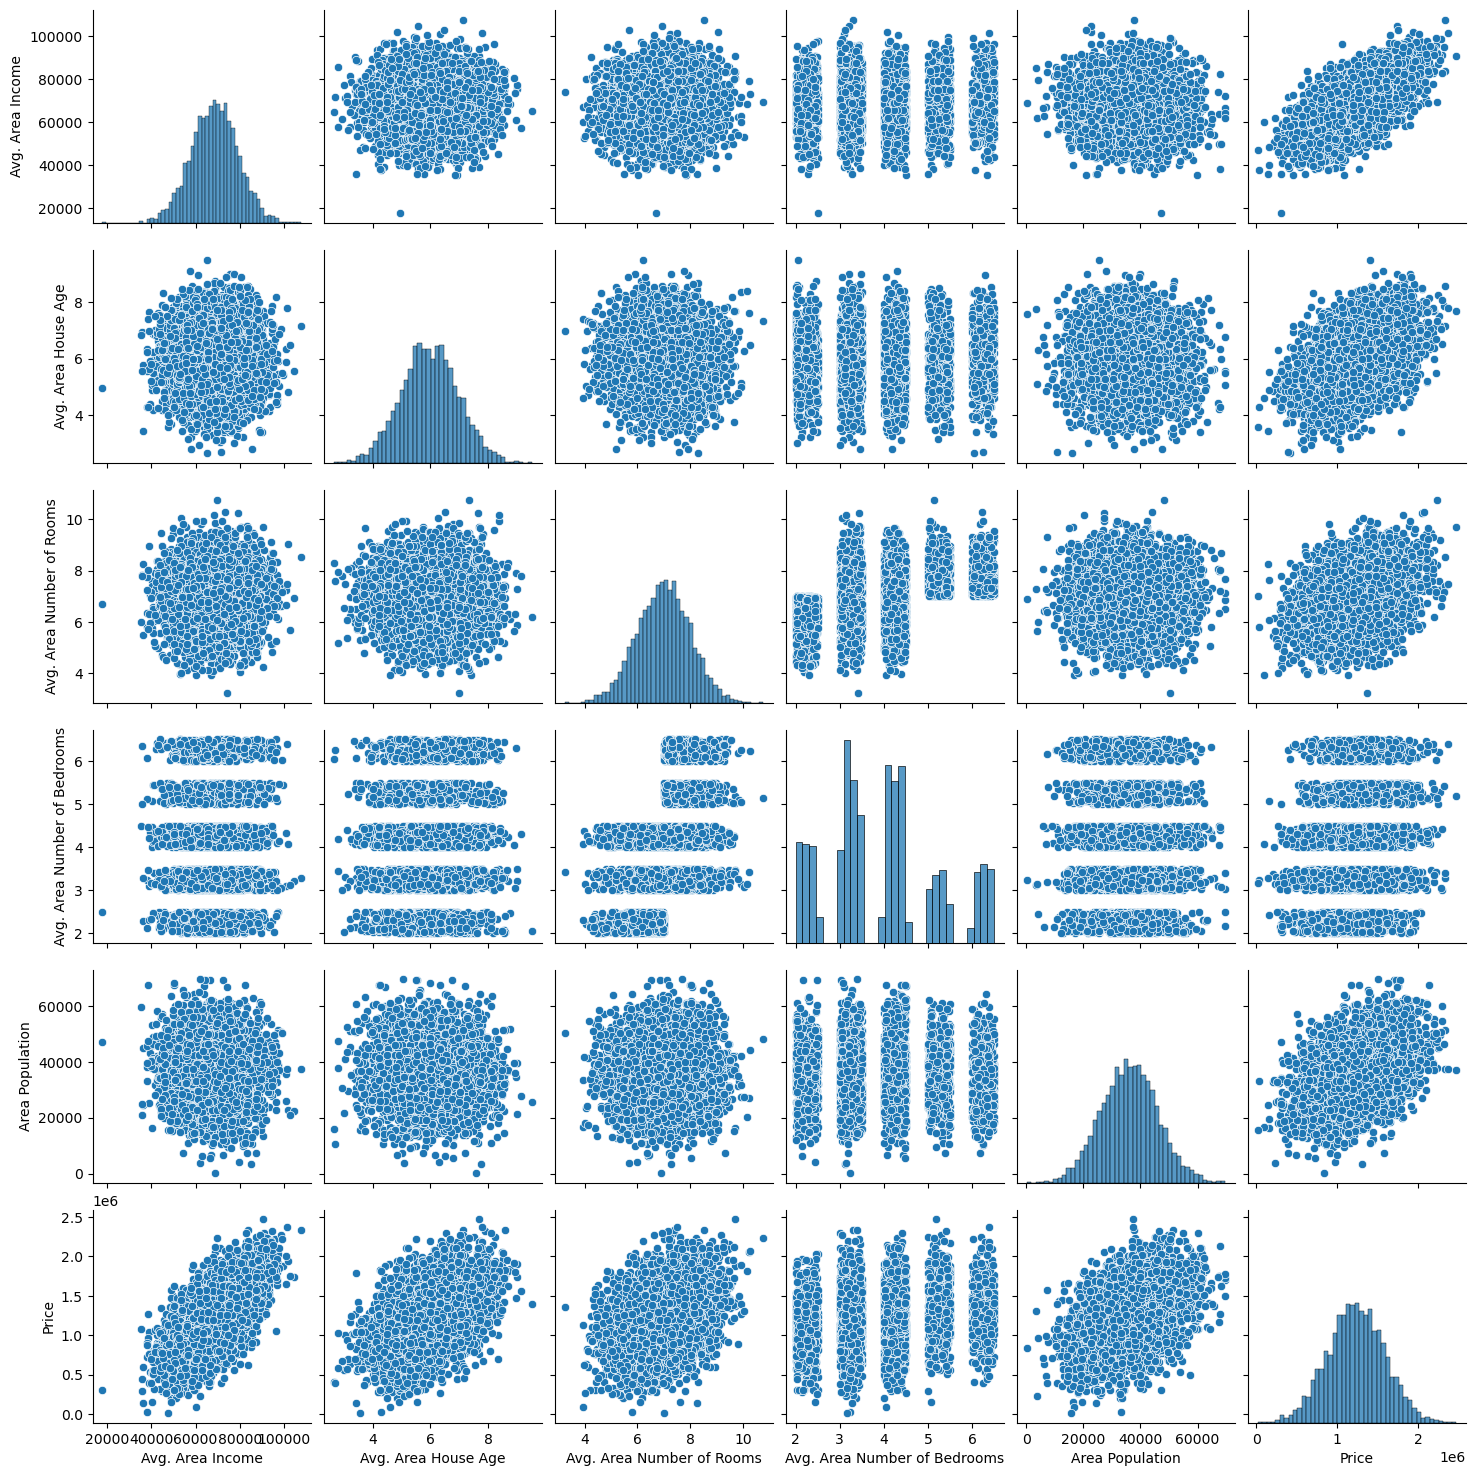

In [16]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

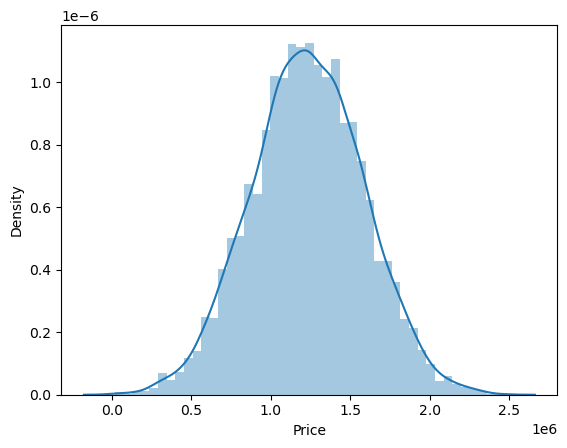

In [17]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

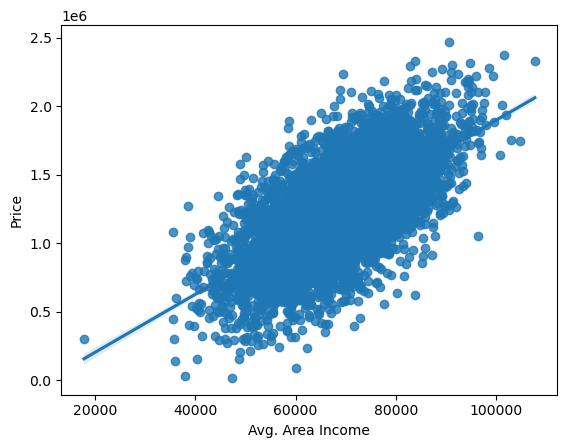

In [18]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [19]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

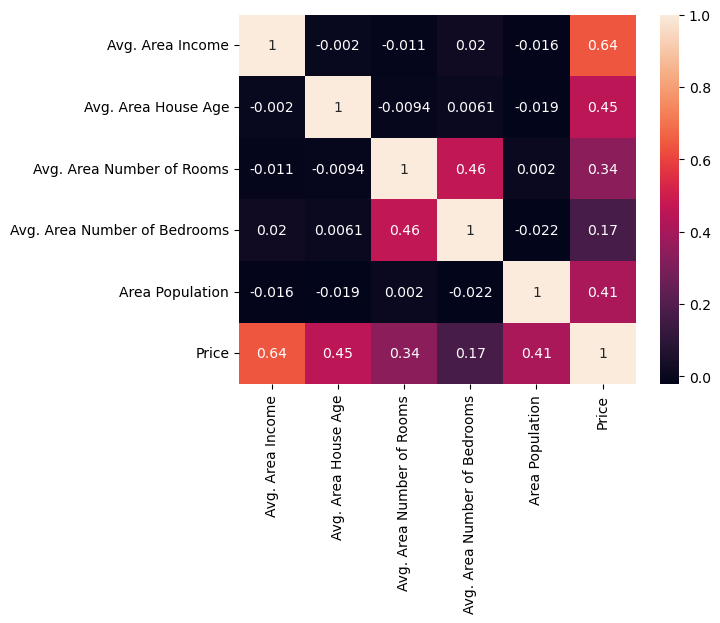

In [20]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [21]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

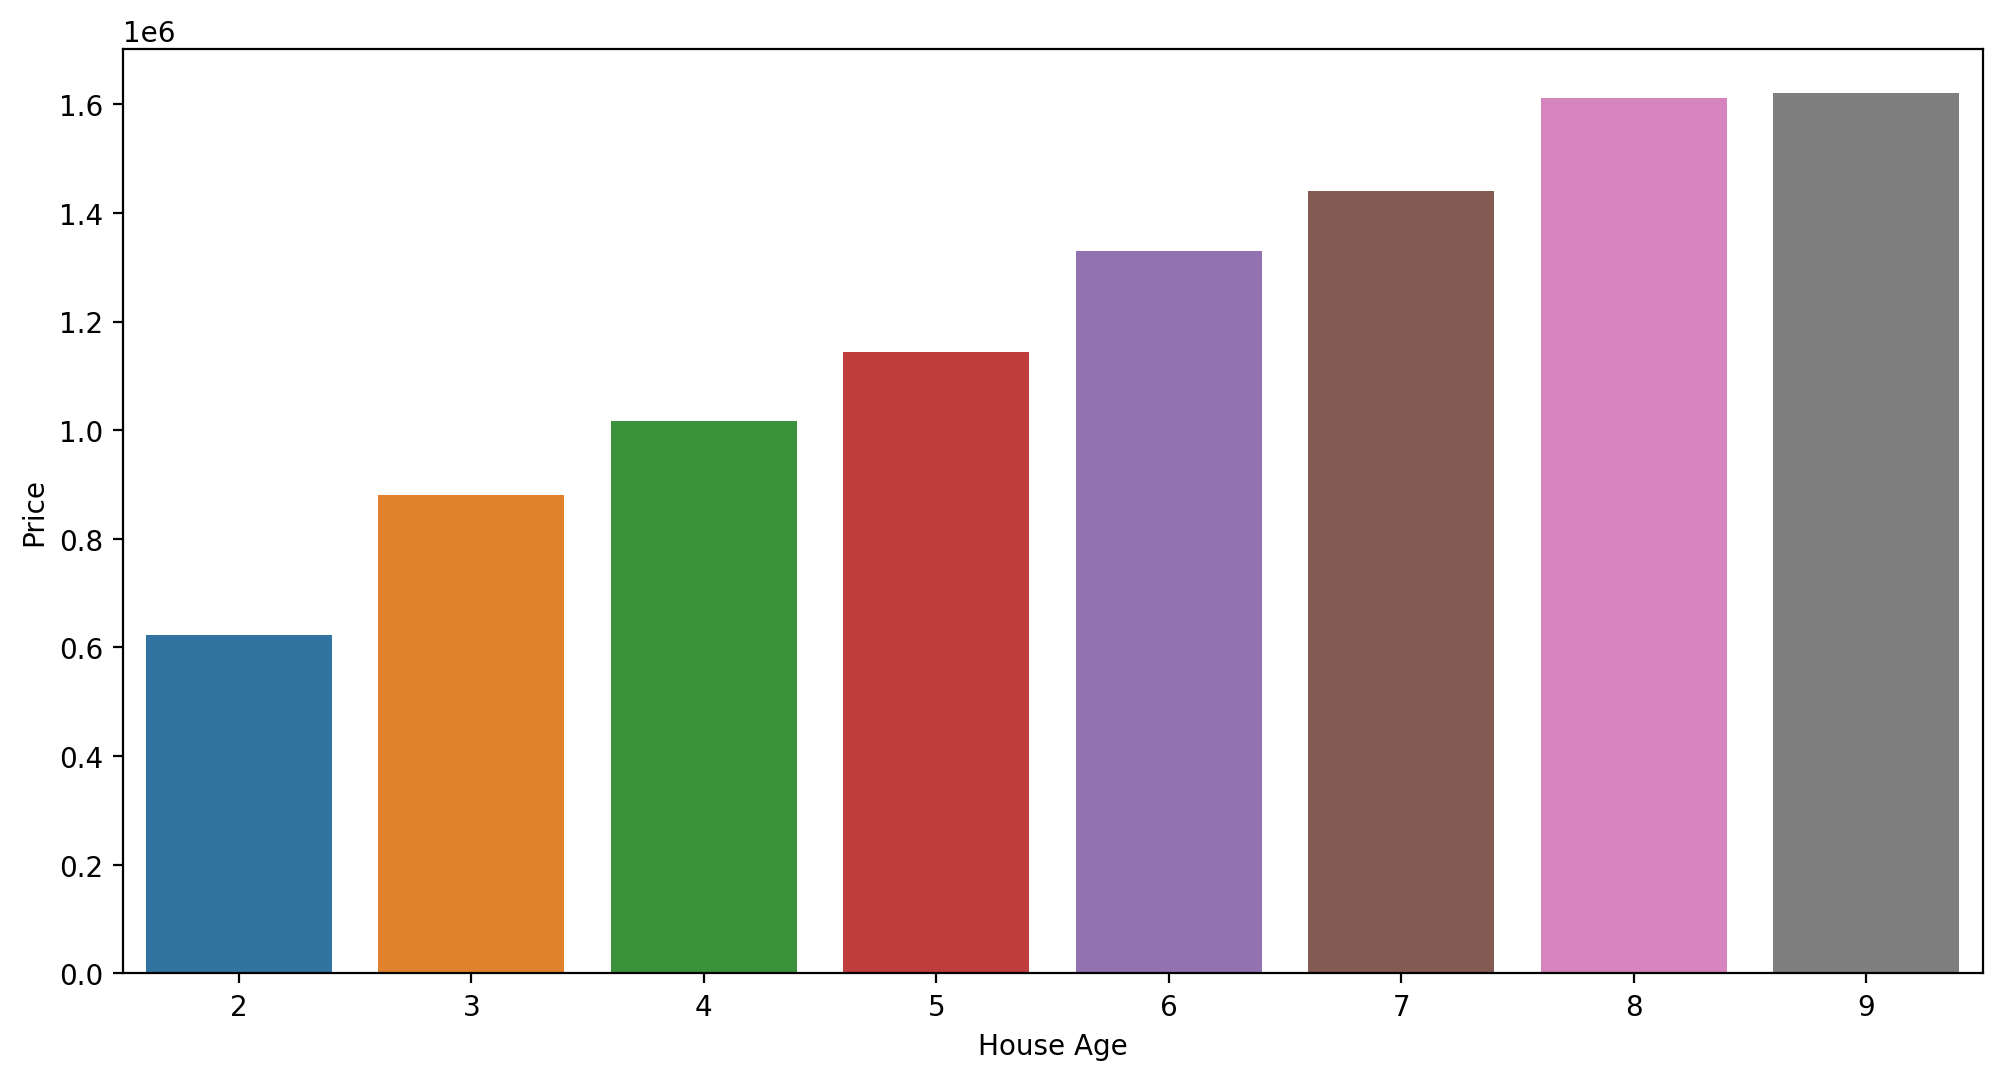

In [22]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [23]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

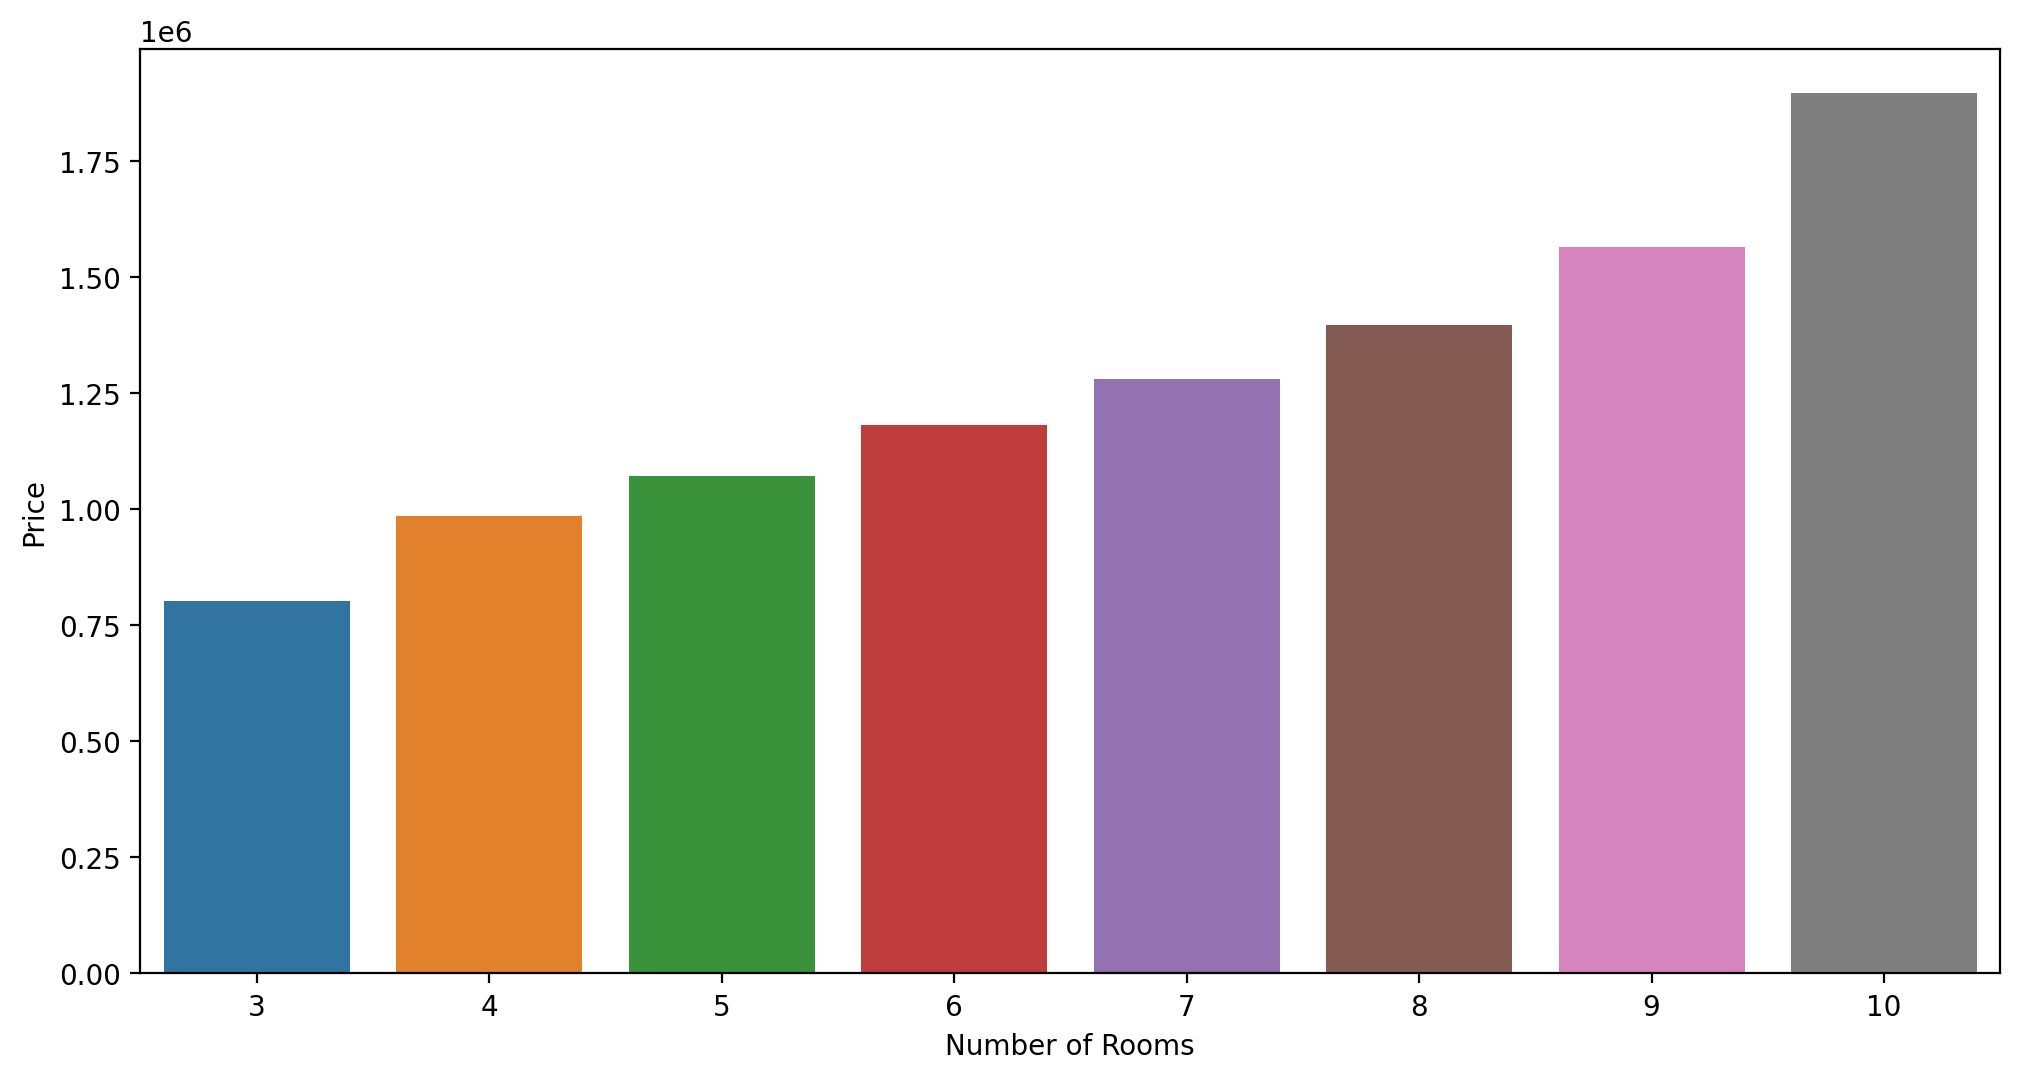

In [24]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [25]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

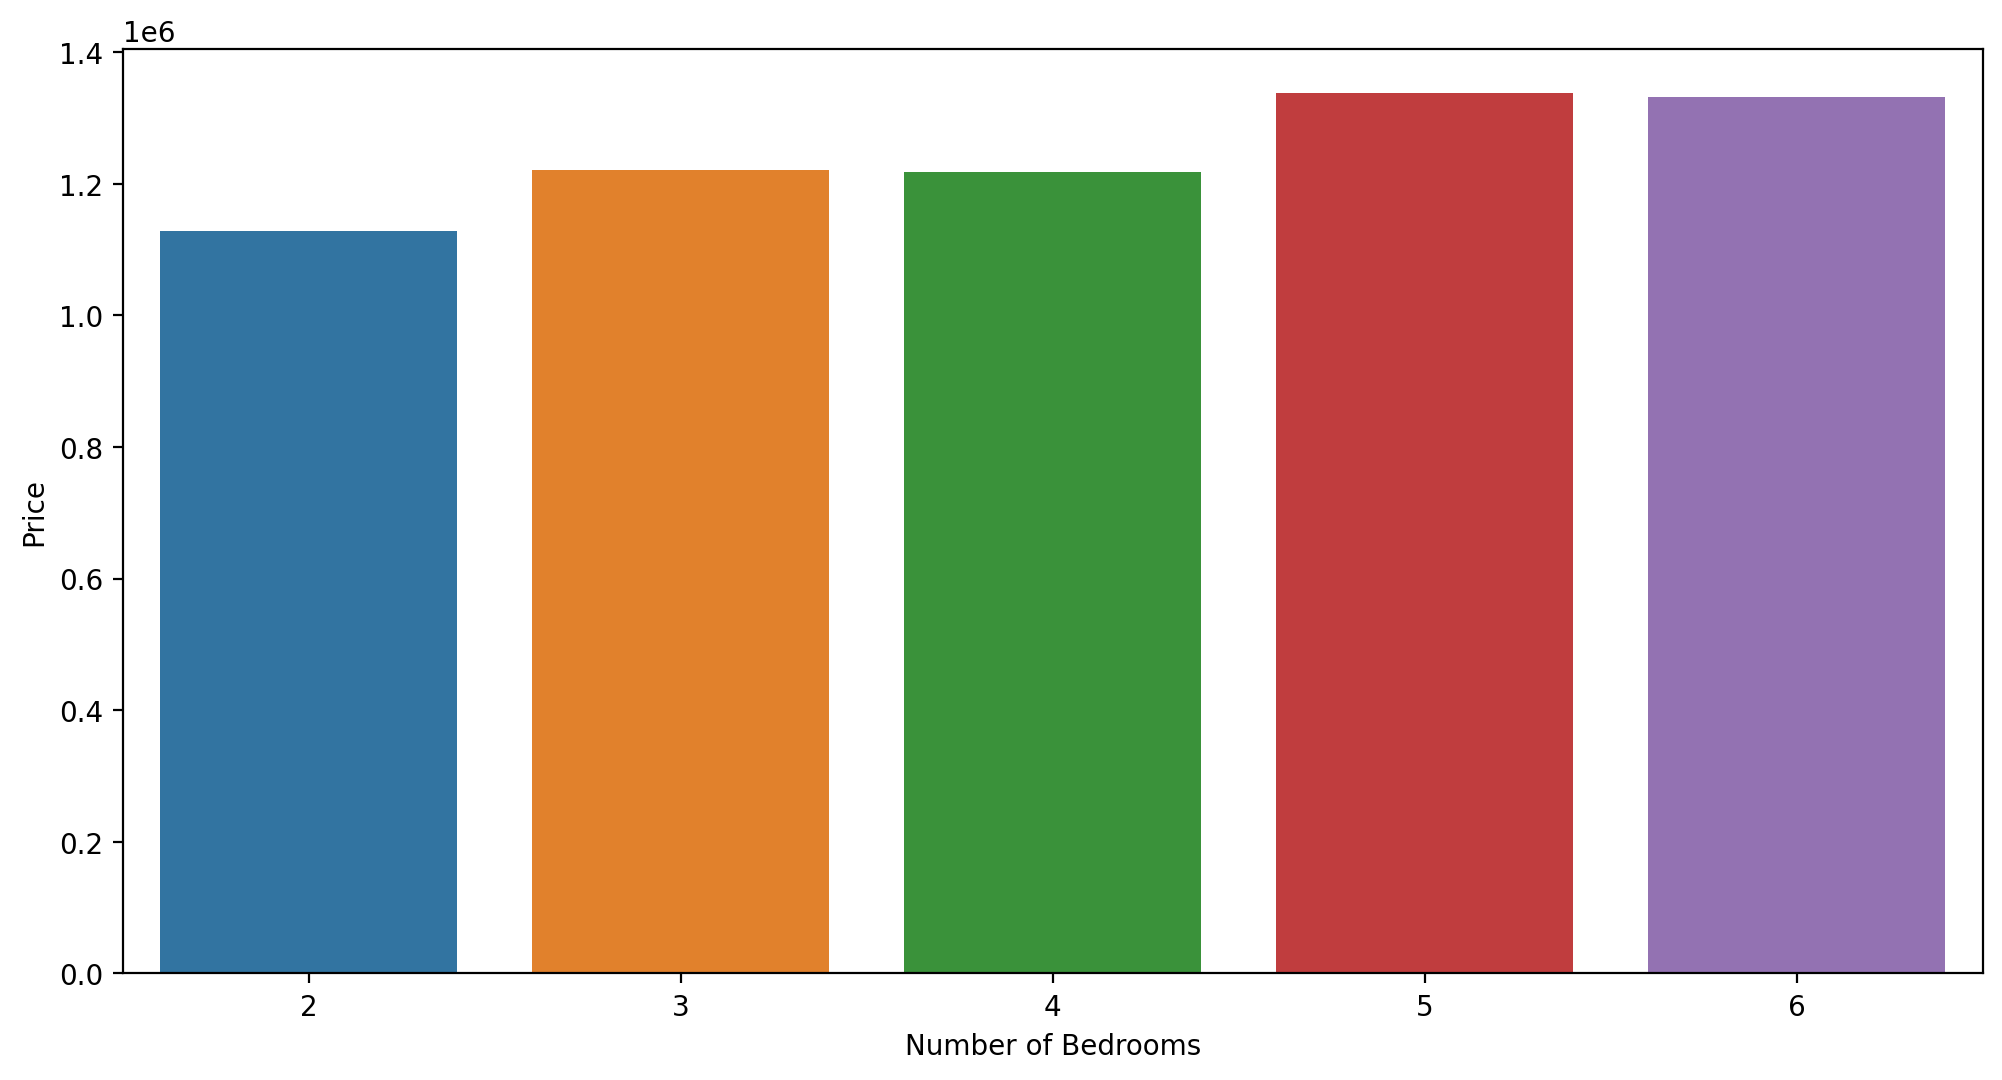

In [26]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [29]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [30]:
y = df['Price']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)
predictions_lr = lrm.predict(X_test) 

In [36]:
lrm.intercept_

-2638673.4261914166

In [37]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [38]:
predictions = lrm.predict(X_test)

In [39]:
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176])

In [40]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

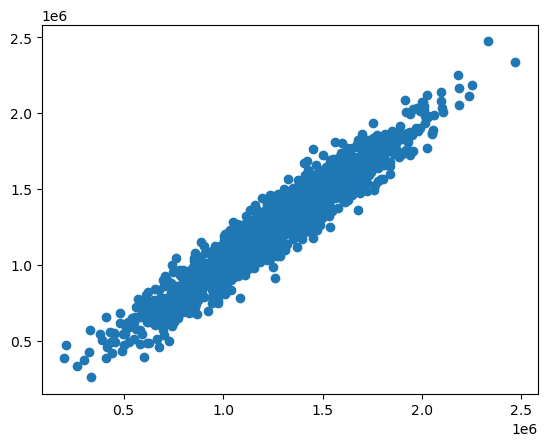

In [41]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

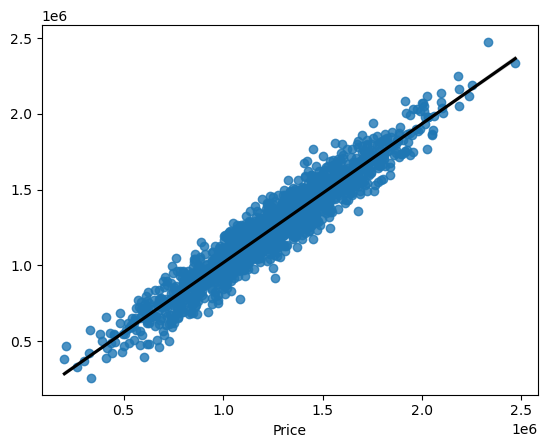

In [42]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

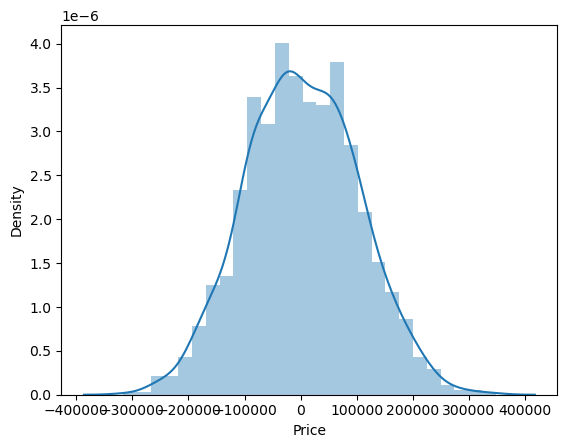

In [43]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [45]:
from sklearn import metrics

In [46]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336905

In [47]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401144

In [48]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485567

In [49]:
metrics.r2_score(y_test, predictions)


0.9146818498753994

## Обучение модели нейронной сети

In [51]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Подготовка данных
numeric_features = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population']
X = df[numeric_features]
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Создание модели
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(5,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Компиляция
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error'])


In [53]:
# Обучение
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1)


Epoch 1/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1635841081344.0000 - mean_absolute_error: 1228159.1250 - val_loss: 1657430212608.0000 - val_mean_absolute_error: 1240747.6250
Epoch 2/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1629613850624.0000 - mean_absolute_error: 1225799.1250 - val_loss: 1639651344384.0000 - val_mean_absolute_error: 1234096.2500
Epoch 3/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1582024622080.0000 - mean_absolute_error: 1207922.3750 - val_loss: 1546183376896.0000 - val_mean_absolute_error: 1199214.0000
Epoch 4/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1416174632960.0000 - mean_absolute_error: 1144522.0000 - val_loss: 1290344595456.0000 - val_mean_absolute_error: 1098826.2500
Epoch 5/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1065481469952.0000 - mean_absolute_error: 996281.0625 - val_loss: 845042679808.0000 - val_mean_absolute_error: 894392.3125
Epoch 6/1000
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5

In [54]:
# Оценка
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {test_mae:.0f}")

predictions = model.predict(X_test_scaled).flatten()
r2 = r2_score(y_test, predictions)
print(f"R²: {r2:.4f}")

Test MAE: 81504
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R²: 0.9138


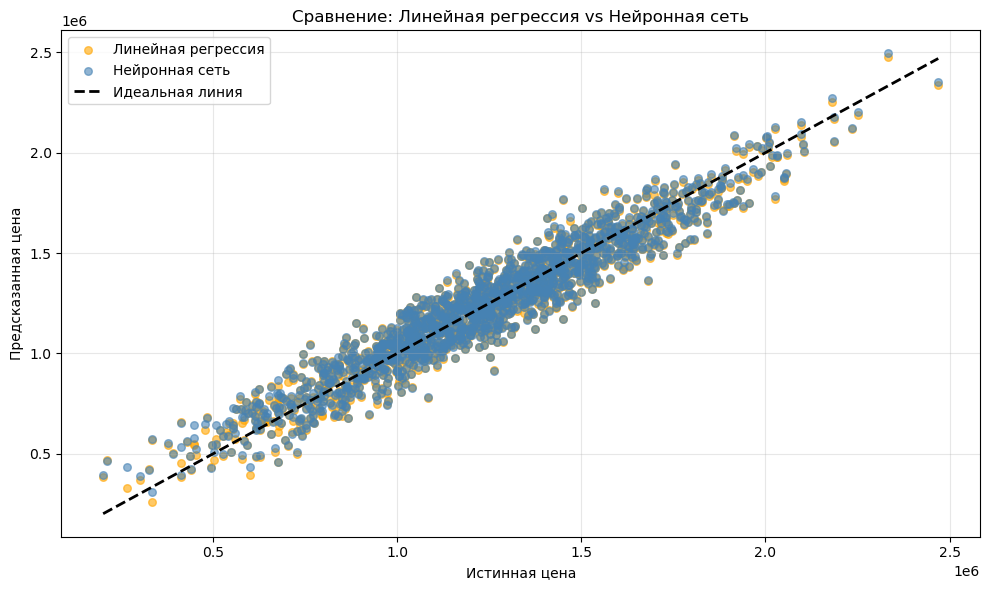

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Точки: истинные значения vs предсказания линейной регрессии
plt.scatter(y_test, predictions_lr, alpha=0.6, color='orange', label='Линейная регрессия', s=30)

# Точки: истинные значения vs предсказания нейронной сети
plt.scatter(y_test, predictions, alpha=0.6, color='steelblue', label='Нейронная сеть', s=30)

# Диагональ — идеальное совпадение
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Идеальная линия')

# Оформление
plt.xlabel('Истинная цена')
plt.ylabel('Предсказанная цена')
plt.title('Сравнение: Линейная регрессия vs Нейронная сеть')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Отображение графика
plt.show()

## Aнсамблевый метод (бэггинг)

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,      # количество деревьев
    max_depth=10,          # максимальная глубина дерева
    random_state=42        # для воспроизводимости
)

rf.fit(X_train, y_train)  

predictions_rf = rf.predict(X_test)


from sklearn.metrics import mean_absolute_error, r2_score

mae_rf = mean_absolute_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)


print(f"MAE: {mae_rf:,.0f}")
print(f"R² : {r2_rf:.4f}")


print("-"*60)
print(f"{'Модель':<20} {'MAE':<12} {'R²':<10}")
print("-"*60)
print(f"Линейная регрессия   {81135:,.0f}     0.9147")  
print(f"Нейронная сеть       {test_mae:,.0f}     {r2:.4f}") 
print(f"Random Forest        {mae_rf:,.0f}     {r2_rf:.4f}")




MAE: 94,933
R² : 0.8776
------------------------------------------------------------
Модель               MAE          R²        
------------------------------------------------------------
Линейная регрессия   81,135     0.9147
Нейронная сеть       81,504     0.9138
Random Forest        94,933     0.8776


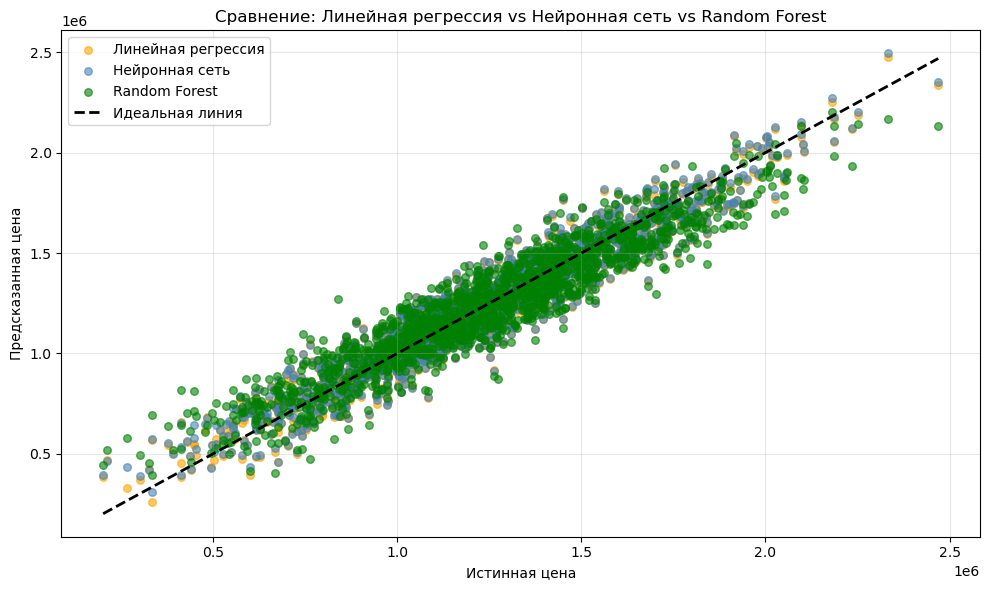

In [58]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions_lr, alpha=0.6, color='orange', label='Линейная регрессия', s=30)
plt.scatter(y_test, predictions, alpha=0.6, color='steelblue', label='Нейронная сеть', s=30)
plt.scatter(y_test, predictions_rf, alpha=0.6, color='green', label='Random Forest', s=30)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Идеальная линия')

plt.xlabel('Истинная цена')
plt.ylabel('Предсказанная цена')
plt.title('Сравнение: Линейная регрессия vs Нейронная сеть vs Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Вывод

Линейная регрессия — лучшая модель для данной задачи регрессии. Она проста и показала наилучшую точность с минимальной ошибкой.
    
Нейронная сеть — почти не уступает, но требует больше данных  и настройки.

Random Forest — менее эффективен в этой задаче, из-за своей «нелинейности» на данных, которые хорошо аппроксимируются линейной зависимостью.

